In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('cleaned_amazon_data.csv')

# Display basic information about the dataset
print(data.head())
print(data.describe())
print(data.info())
print(data.nunique())

                                               title   price  rating  reviews  \
0  Corsair 4000D Airflow Tempered Glass Mid-Tower...  130.00     4.7      1.0   
1  GEEKOM Mini IT13 Mini PC 13th Gen Intel Core i...  849.00     4.8      8.0   
2  KAMRUI [Gaming PC] Mini PC AMD Ryzen 7 5700U U...  629.99     4.3    175.0   
3  (Renewed) Dell OptiPlex 7050 SFF Desktop PC Co...  389.00     4.6      3.0   
4  DELL Desktop PC 3020/Win 11/Core i5-4590/wajun...  349.00     5.0      1.0   

   availability   category  sales_rank     brand  
0             1  Computers       276.0  ‎CORSAIR  
1             1  Computers      9938.0   ‎GEEKOM  
2             1  Computers      1199.0   ‎KAMRUI  
3             1  Computers     16515.0     ‎DELL  
4             1  Computers     24507.0    ‎wajun  
             price     rating     reviews  availability    sales_rank
count    49.000000  49.000000   49.000000          49.0     49.000000
mean    681.303878   4.187755   49.020408           1.0  15699.1836

In [4]:
# Set Seaborn style
sns.set(style="whitegrid")

# Function to create histogram plots
def plot_distribution(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


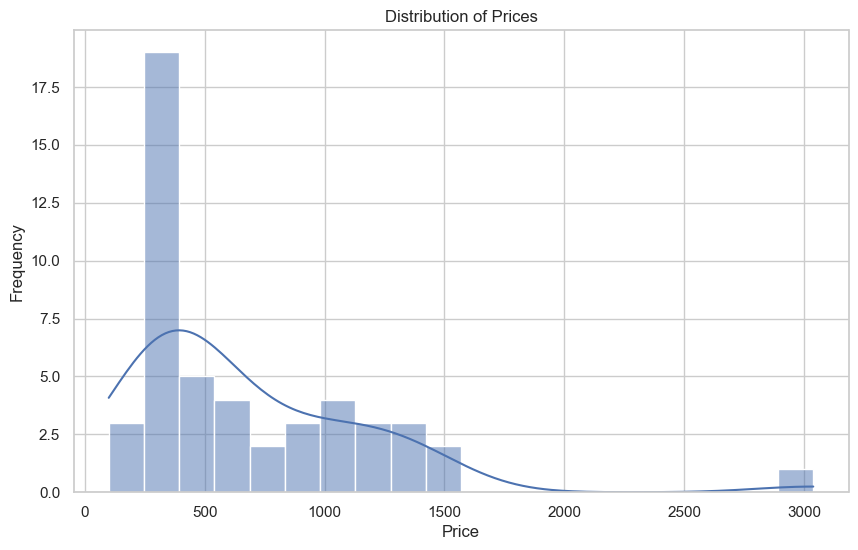

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


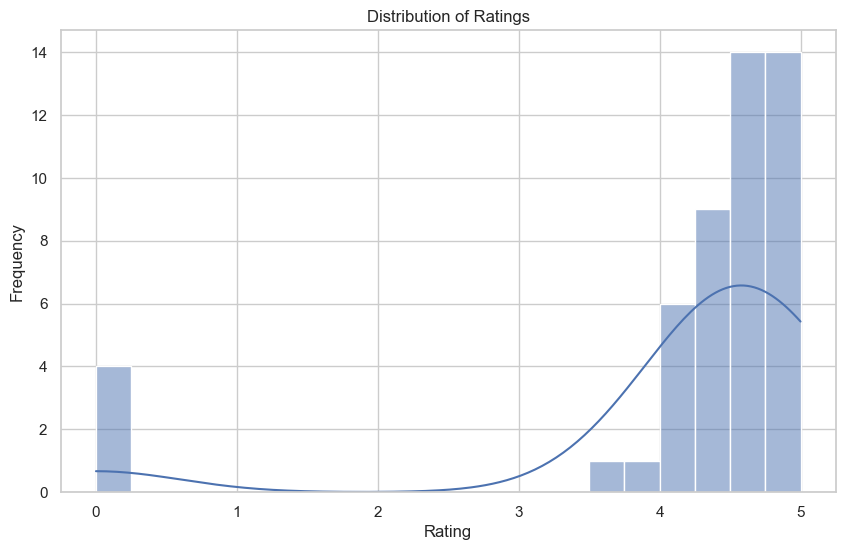

In [5]:
# Distribution Analysis
plot_distribution(data, 'price', 'Distribution of Prices', 'Price')
plot_distribution(data, 'rating', 'Distribution of Ratings', 'Rating')

# Function to create bar plots for average values by brand
def plot_average_by_brand(data, column, title, xlabel):
    average_by_brand = data.groupby('brand')[column].mean().sort_values()
    plt.figure(figsize=(12, 8))
    average_by_brand.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Brand')
    plt.show()

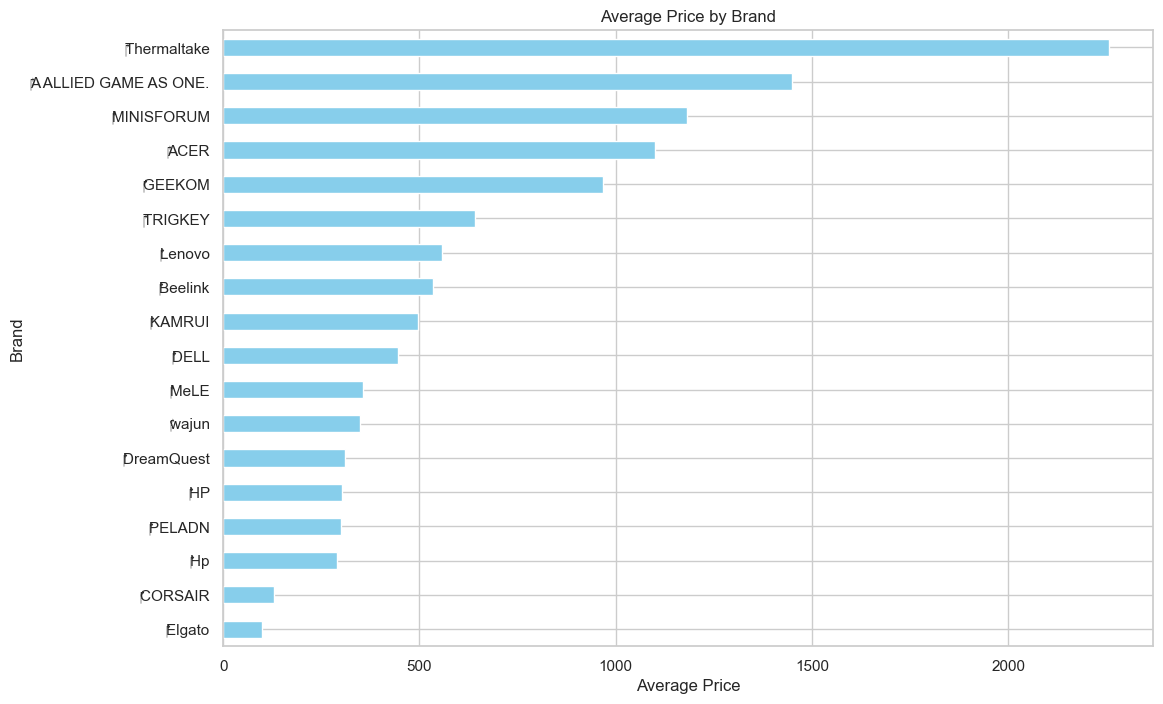

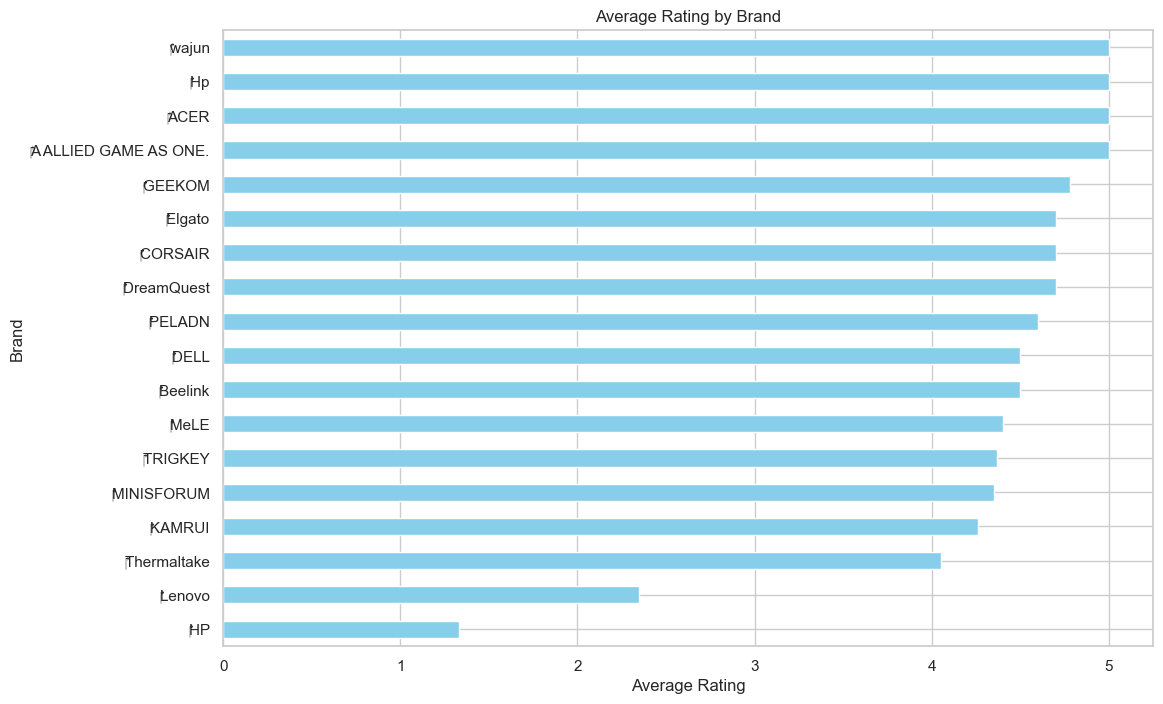

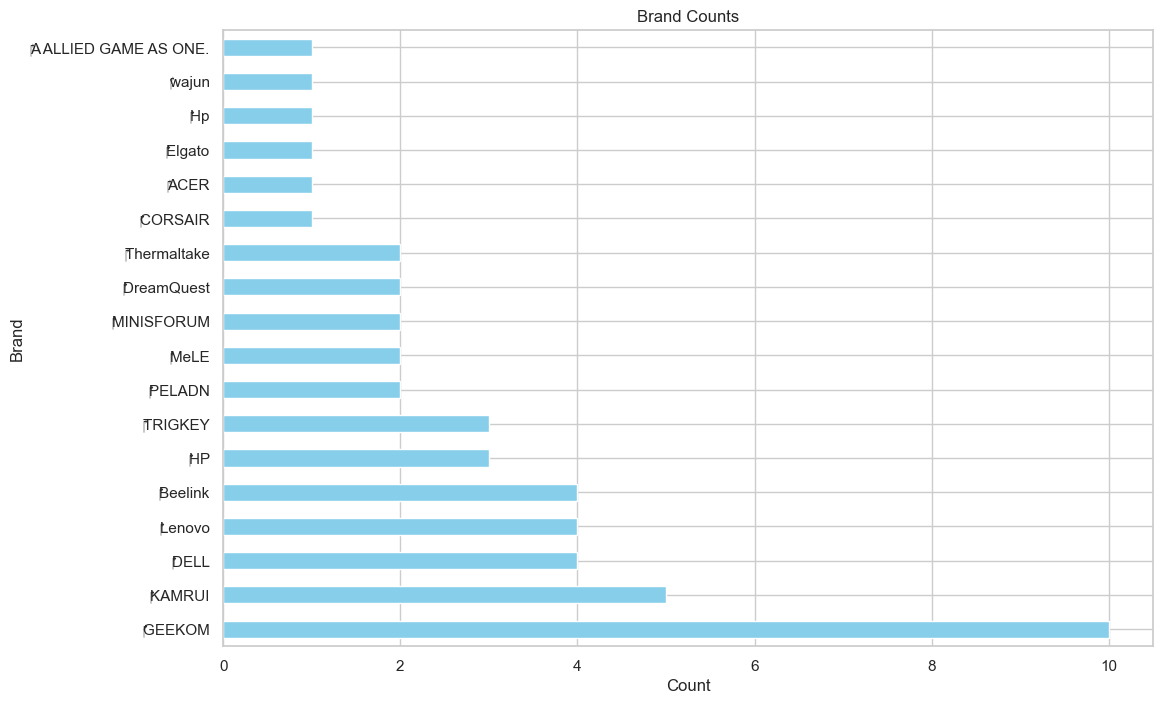

In [6]:
# Price and Rating Analysis
plot_average_by_brand(data, 'price', 'Average Price by Brand', 'Average Price')
plot_average_by_brand(data, 'rating', 'Average Rating by Brand', 'Average Rating')

# Brand Counts
plt.figure(figsize=(12, 8))
data['brand'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Brand Counts')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

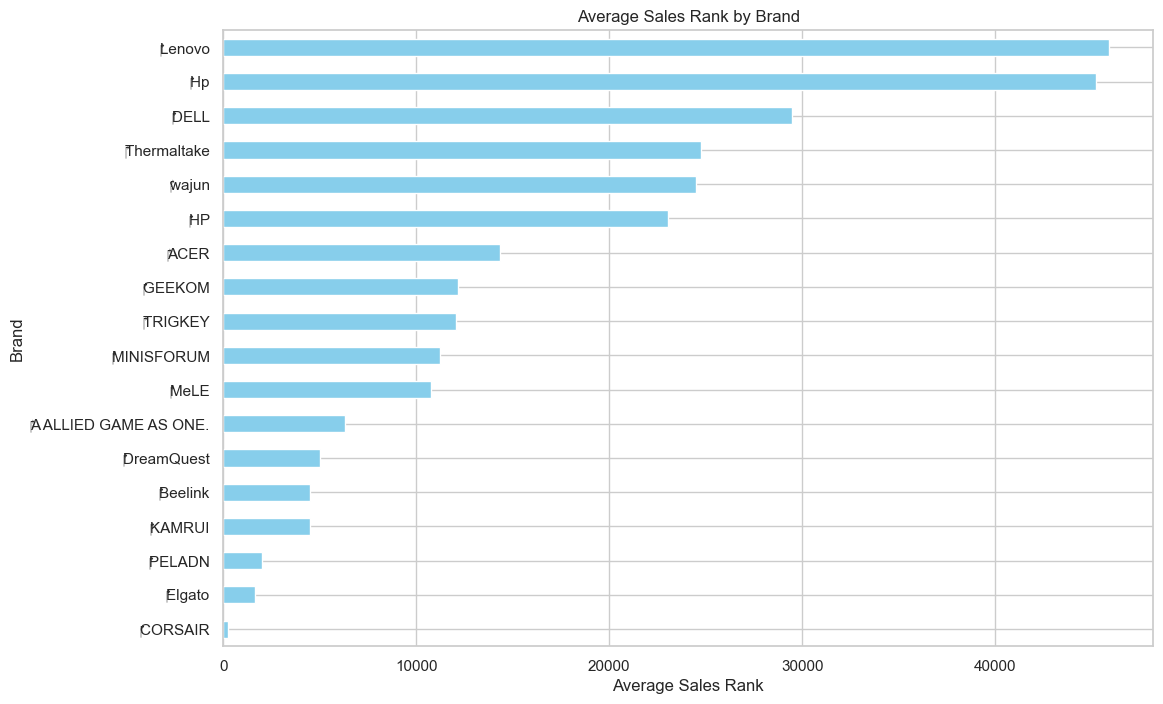

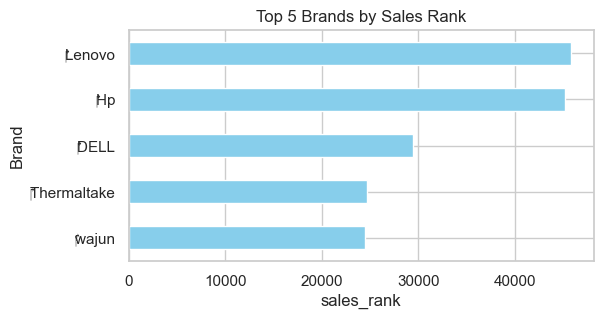

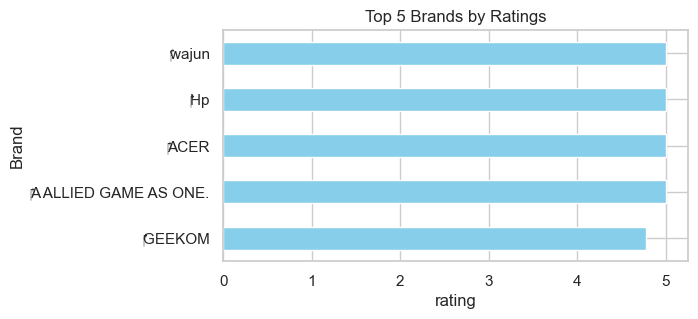

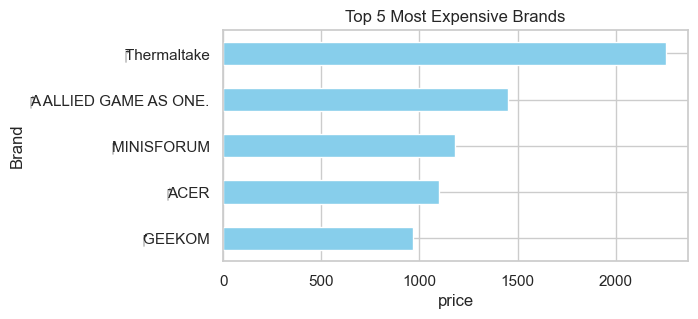

In [7]:
# Sales Rank Analysis
plot_average_by_brand(data, 'sales_rank', 'Average Sales Rank by Brand', 'Average Sales Rank')

# Top 5 Brands by Sales Rank, Ratings, and Price
def plot_top_brands(data, column, title):
    average_by_brand = data.groupby('brand')[column].mean().sort_values()[-5:]
    plt.figure(figsize=(6, 3))
    average_by_brand.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Brand')
    plt.show()

plot_top_brands(data, 'sales_rank', 'Top 5 Brands by Sales Rank')
plot_top_brands(data, 'rating', 'Top 5 Brands by Ratings')
plot_top_brands(data, 'price', 'Top 5 Most Expensive Brands')

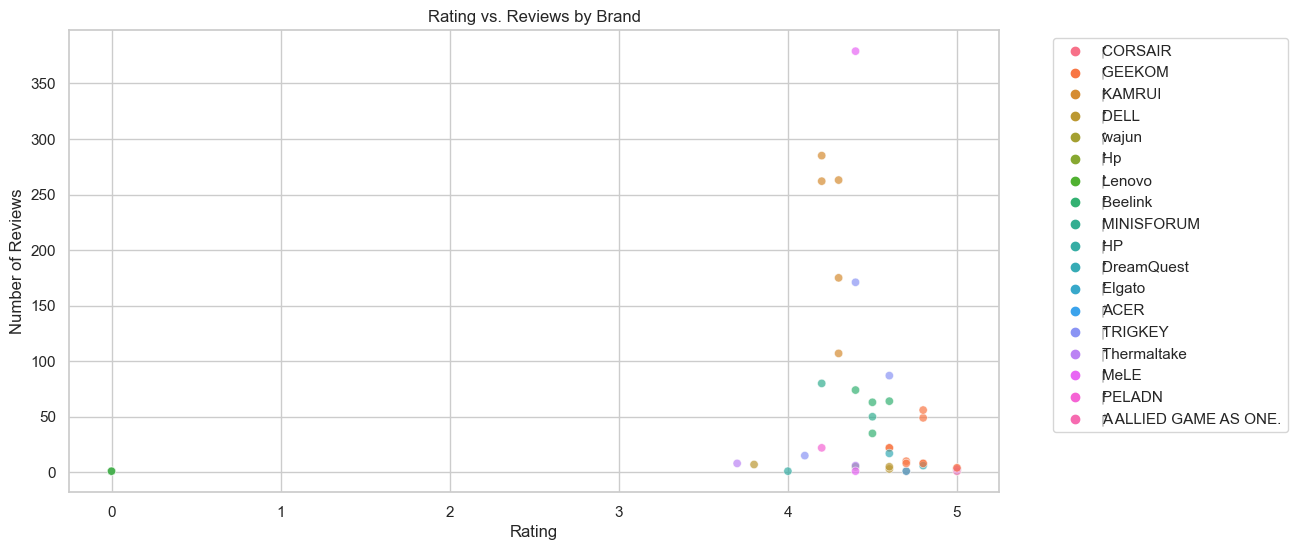

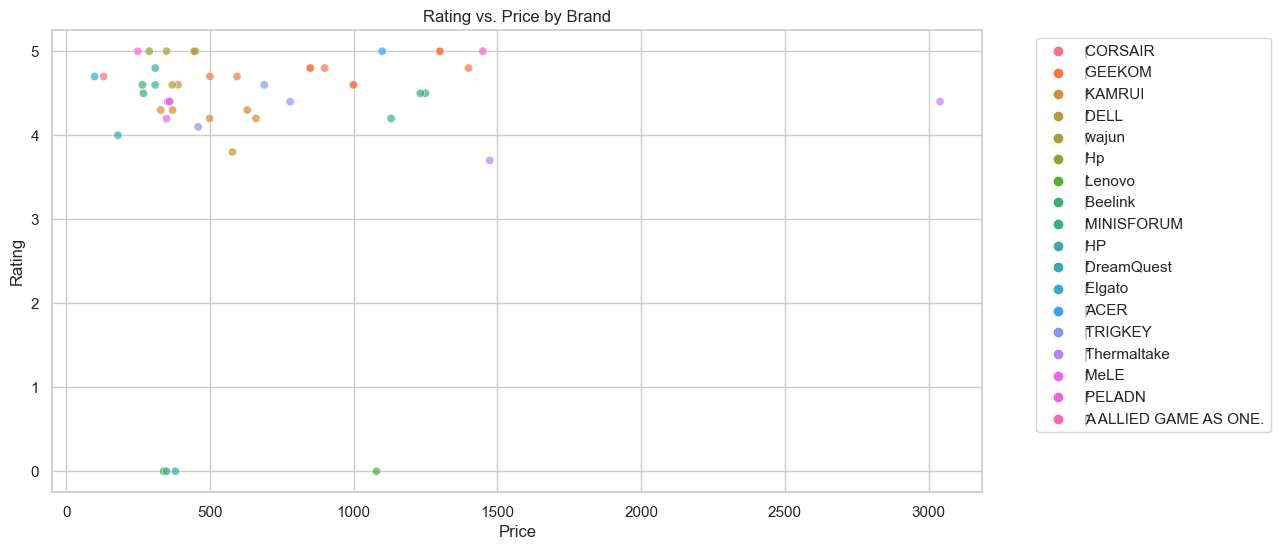

In [8]:
# Scatter plots for Rating vs. Reviews and Price
def scatter_plot(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

scatter_plot(data, 'rating', 'reviews', 'brand', 'Rating vs. Reviews by Brand', 'Rating', 'Number of Reviews')
scatter_plot(data, 'price', 'rating', 'brand', 'Rating vs. Price by Brand', 'Price', 'Rating')

In [9]:
# Correlation Analysis
cor_rating_reviews = data['rating'].corr(data['reviews'])
cor_rating_price = data['rating'].corr(data['price'])
print("Correlation between Rating and Reviews:", cor_rating_reviews)
print("Correlation between Rating and Price:", cor_rating_price)

Correlation between Rating and Reviews: 0.07852051593472238
Correlation between Rating and Price: 0.08454330822482843


In [10]:
# Prepare data for modeling
model_data = pd.get_dummies(data.drop(columns=['title', 'category', 'availability']), columns=['brand'])
model_data.dropna(subset=['price', 'rating', 'reviews', 'sales_rank'], inplace=True)

# Define features and target variable
X = model_data[['rating', 'reviews', 'sales_rank']]
y = model_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 256930.49859053415


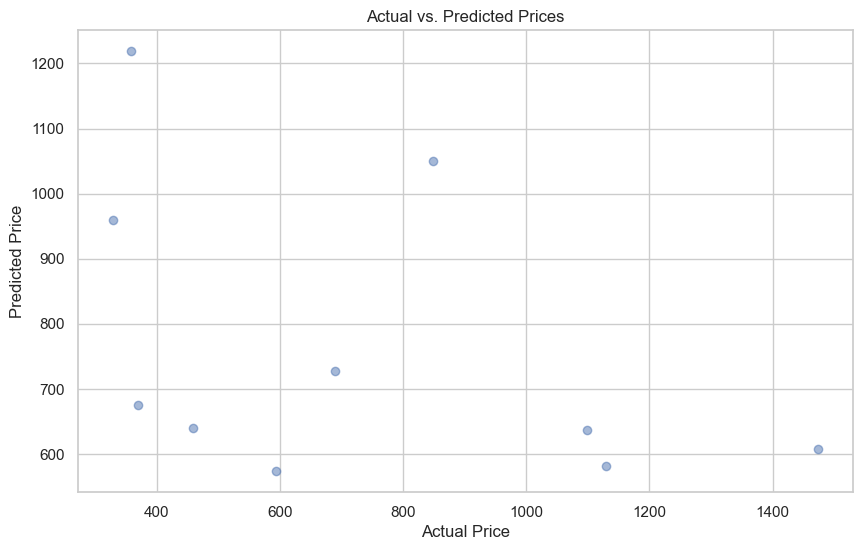

In [12]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [13]:
# Display results
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(results_df)

    Actual Price  Predicted Price
13        329.00         959.5136
45       1473.00         607.7058
47        459.00         640.7036
44        369.99         676.0174
17        359.00        1218.7478
27        689.00         727.5838
26       1129.99         580.9944
25       1099.00         637.2918
31        849.00        1050.7633
19        594.15         573.6435
